In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

In [1]:
!pip install ucimlrepo

In [11]:
#load the dataset
air_quality=fetch_ucirepo(id=360)


In [13]:
#check the dataset
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [16]:
df=air_quality.data.features

In [17]:
#Select the specific columns for anomaly detection
features=df[['CO(GT)', 'C6H6(GT)','NOx(GT)','NO2(GT)']]
features.head()

#df = pd.DataFrame(air_quality.data.values, columns=air_quality.feature_names)

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [22]:
#paramters for isolation forest
n_estimators=100 #number of trees in the forest
max_samples='auto' #number of samples to draw from the dataset to train each tree
contamination=0.01 #proportion of outliers in the dataset
sample_size=256  #number of samples to draw from the dataset to train each tree

In [23]:
#train the isolatio  forest model
model=IsolationForest(n_estimators=n_estimators, max_samples=sample_size, contamination=contamination, random_state=42)
model.fit(features)

#preidct anoalies
anomaly_labels=model.predict(features)
#-1 for anomalies,1 for normal instances

In [24]:
#create new column in the originak dataframe to store the anomaly labels
features['anomaly']=anomaly_labels
features.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31724\2846510283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly']=anomaly_labels


,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [29]:
#chevk value counts of anomaly labels
features['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

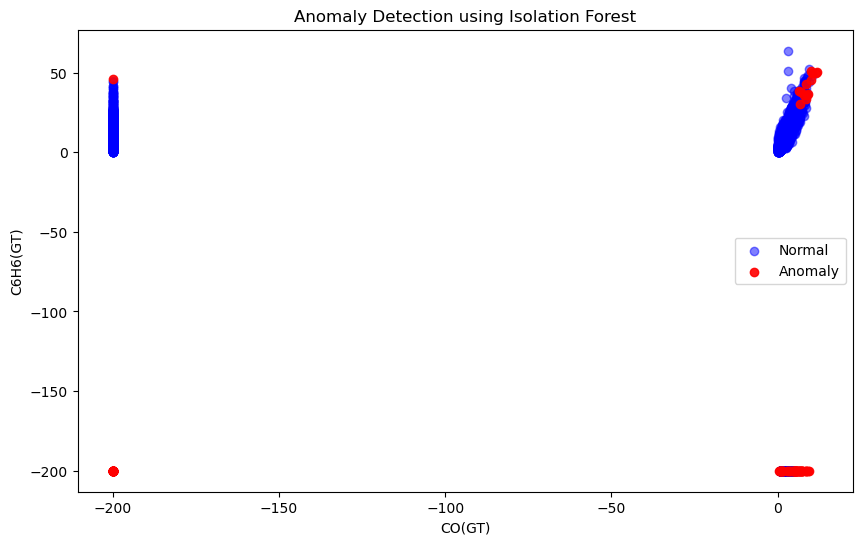

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# normal points
normal_data = features[features['anomaly'] == 1]
plt.scatter(normal_data['CO(GT)'],
            normal_data['C6H6(GT)'],
            color='blue',
            label='Normal',
            alpha=0.5)

# anomaly points
anomalies = features[features['anomaly'] == -1]
plt.scatter(anomalies['CO(GT)'],
            anomalies['C6H6(GT)'],
            color='red',
            label='Anomaly',
            alpha=0.9)

plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
plt.legend()
plt.show()


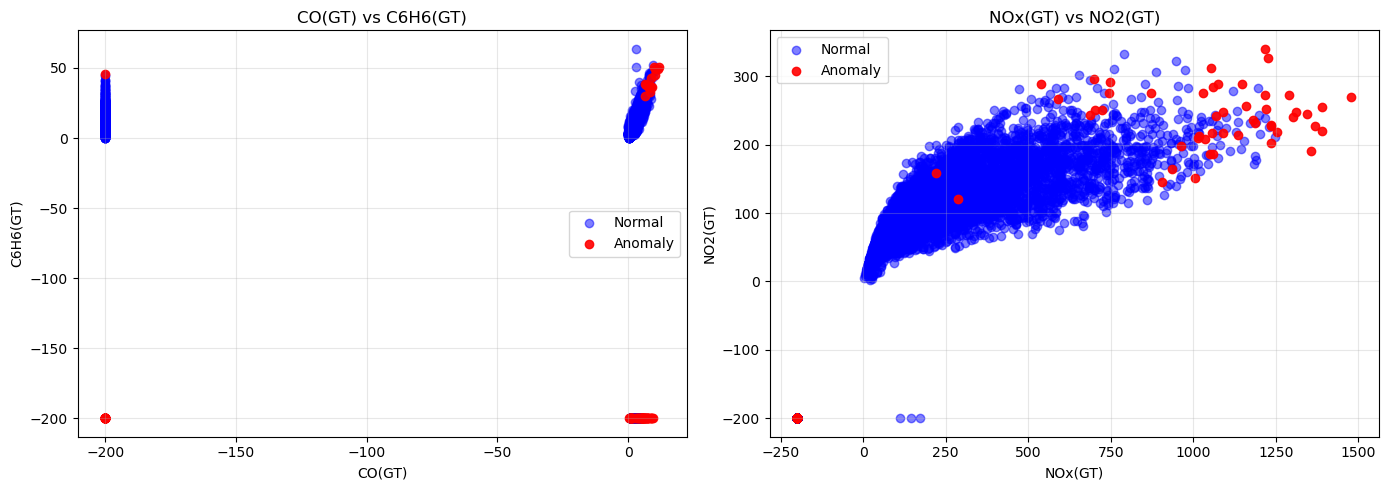

Normal data points: 9263
Anomalies detected: 94


In [39]:
import matplotlib.pyplot as plt

# remove unwanted spaces in column names
features.columns = features.columns.str.strip()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# -------- Plot 1: CO vs C6H6 --------
axes[0].scatter(normal['CO(GT)'],
                normal['C6H6(GT)'],
                color='blue',
                label='Normal',
                alpha=0.5)

axes[0].scatter(anomaly['CO(GT)'],
                anomaly['C6H6(GT)'],
                color='red',
                label='Anomaly',
                alpha=0.9)

axes[0].set_title("CO(GT) vs C6H6(GT)")
axes[0].set_xlabel("CO(GT)")
axes[0].set_ylabel("C6H6(GT)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# -------- Plot 2: NOx vs NO2 --------
axes[1].scatter(normal['NOx(GT)'],
                normal['NO2(GT)'],
                color='blue',
                label='Normal',
                alpha=0.5)

axes[1].scatter(anomaly['NOx(GT)'],
                anomaly['NO2(GT)'],
                color='red',
                label='Anomaly',
                alpha=0.9)

axes[1].set_title("NOx(GT) vs NO2(GT)")
axes[1].set_xlabel("NOx(GT)")
axes[1].set_ylabel("NO2(GT)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

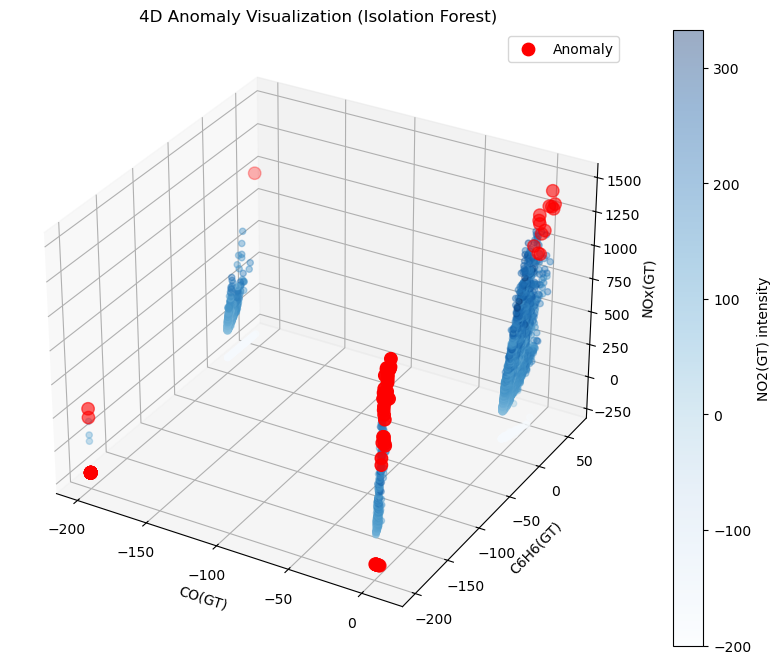

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# -------- NORMAL DATA --------
p = ax.scatter(
    normal['CO(GT)'],
    normal['C6H6(GT)'],
    normal['NOx(GT)'],
    c=normal['NO2(GT)'],      # 4th dimension as color
    cmap='Blues',
    alpha=0.4,
    s=20
)

# -------- ANOMALIES --------
ax.scatter(
    anomaly['CO(GT)'],
    anomaly['C6H6(GT)'],
    anomaly['NOx(GT)'],
    color='red',
    s=80,
    label='Anomaly'
)

# labels
ax.set_xlabel('CO(GT)')
ax.set_ylabel('C6H6(GT)')
ax.set_zlabel('NOx(GT)')
ax.set_title("4D Anomaly Visualization (Isolation Forest)")

# colorbar for 4th dimension
cbar = plt.colorbar(p)
cbar.set_label('NO2(GT) intensity')

plt.legend()
plt.show()


In [41]:
import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700
)
 
fig.show()
 
 